## Introduction to the dataset

- Use the pandas library to read bike_rental_hour.csv into the dataframe bike_rentals.
- Print out the first few rows of bike_rentals and take a look at the data.
- Make a histogram of the cnt column of bike_rentals, and take a look at the distribution of total rentals.
- Use the corr method on the bike_rentals dataframe to explore how each column is correlated with cnt.


In [75]:
import pandas
import numpy as np

bike_rentals = pandas.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

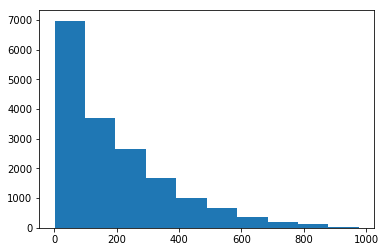

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(bike_rentals["cnt"])

In [26]:
correlations=bike_rentals.corr(method="pearson")
correlations["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

## Calculate features

- Write a function called assign_label that takes in a numeric value for an hour, and returns:
    - 1 if the hour is from 6 to 12
    - 2 if the hour is from 12 to 18
    - 3 if the hour is from 18 to 24
    - 4 if the hour is from 0 to 6
- Use the apply method on series objects to apply the function to each item in the hr column.
- Assign the result to the time_label column of bike_rentals.

In [17]:
def assign_label(num):
    if 6 <= num and num <= 12:
        return(1)
    if 12 <= num and num <= 18:
        return(2)
    if 18 <= num and num <= 24:
        return(3)
    if 0 <= num and num <= 12:
        return(4)
    
bike_rentals['time_label'] = bike_rentals["hr"].apply(lambda num: assign_label(num))

In [18]:
bike_rentals["time_label"]

0        4
1        4
2        4
3        4
4        4
5        4
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       2
14       2
15       2
16       2
17       2
18       2
19       3
20       3
21       3
22       3
23       3
24       4
25       4
26       4
27       4
28       4
29       1
        ..
17349    2
17350    3
17351    3
17352    3
17353    3
17354    3
17355    4
17356    4
17357    4
17358    4
17359    4
17360    4
17361    1
17362    1
17363    1
17364    1
17365    1
17366    1
17367    1
17368    2
17369    2
17370    2
17371    2
17372    2
17373    2
17374    3
17375    3
17376    3
17377    3
17378    3
Name: time_label, Length: 17379, dtype: int64

## Splitting the Data Into Train and Test Sets

- Based on your explorations of the cnt column, pick an error metric you want to use to evaluate the performance of the machine learning algorithms. Explain why you chose this metric in a markdown cell.
- Select 80% of the rows in bike_rentals to be part of the training set using the sample method on bike_rentals. Assign the result to train.
- Select the rows that are in bike_rentals but not in train to be in the testing set. Assign the result to test.
     - This line will generate a Boolean series that's False when a row in bike_rentals isn't found in train: bike_rentals.index.isin(train.index)
     - This line will select any rows in bike_rentals that aren't found in train to be in the testing set: bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Error metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [27]:
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Applying Linear Regression

- Create a list of predictor columns to use in training and predictions.
    - At a minimum, this list should exclude the cnt, casual, dteday, and registered columns.
    - Feel free to remove other columns you don't think will be useful for the predictions.
- Use the LinearRegression class from sklearn to train a machine learning algorithm on train.
    - Use only the columns in the list of predictors for this.
- Make predictions using the LinearRegression class on test.
    - Use the exact same predictor columns here.
- Calculate the error between the predictions and the actual values.
- Write your thoughts about the predictions and the error in a markdown cell.

In [92]:
predictor = ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


In [93]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X=train[predictor], y=train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
predictions=model.predict(test[predictor])

In [95]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["cnt"], predictions)
print("mse", mse)
rmse = mse ** (1/2)
print("rmse", rmse)
print("target range", bike_rentals["cnt"].min(), "-", bike_rentals["cnt"].max())
print("target sd", np.std(bike_rentals["cnt"]))

mse 20341.817100251024
rmse 142.62474224429303
target range 1 - 977
target sd 181.38238043116962


Considering the existing distribution of cnt, the RMSE I got is very high (almost to the magnitude of the target's standard dev).

## Applying decision tree

- Use the DecisionTreeRegressor class to fit a decision tree algorithm to the train data.
- Make predictions using the DecisionTreeRegressor class on test.
- Calculate the error between the predictions and the actual values.
- Experiment with various parameters of the DecisionTreeRegressor class, including min_samples_leaf, to see if it changes the error.
- Write your thoughts on the predictions and the error in a markdown cell.

In [96]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(train[predictor],train["cnt"])
predictions=model.predict(test[predictor])



In [97]:
## Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["cnt"], predictions)
print("mse", mse)
rmse = mse ** (1/2)
print("rmse", rmse)
print("target range", bike_rentals["cnt"].min(), "-", bike_rentals["cnt"].max())
print("target sd", np.std(bike_rentals["cnt"]))



mse 3089.8668009205985
rmse 55.58657032881772
target range 1 - 977
target sd 181.38238043116962



The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed.
RMSE = standard_deviation. So lower than this, your model is demonstrating some ability to learn; above that number, you haven't even learned to guess the mean correctly.


In [98]:
# Trying decision tree again with some model parameters
model=DecisionTreeRegressor(min_samples_leaf=2)
model.fit(train[predictor],train["cnt"])
predictions=model.predict(test[predictor])

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["cnt"], predictions)
print("mse", mse)
rmse = mse ** (1/2)
print("rmse", rmse)
print("target range", bike_rentals["cnt"].min(), "-", bike_rentals["cnt"].max())
print("target sd", np.std(bike_rentals["cnt"]))


mse 2949.1861494693776
rmse 54.30640983778414
target range 1 - 977
target sd 181.38238043116962


Hey, not bad, restricting minimum leaf samples reduced the RMSE slightly. Overall, the decision tree model is a vast improvement (in terms of reduction of error metric) on the original linear regresssion model.

## Applying random forest

- Use the RandomForestRegressor class to fit a random forest algorithm to the train data.
- Make predictions using the RandomForestRegressor class on test.
- Calculate the error between the predictions and the actual values.
- Experiment with various parameters of the RandomForestRegressor class, including min_samples_leaf, to see if it changes the error.
- Write your thoughts on the predictions and the error in a markdown cell.

In [100]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(train[predictor], train["cnt"])
predicts = forest.predict(test[predictor])
rmse = mean_squared_error(test["cnt"], predicts) ** (1/2)
print(rmse)

# Again testing for overfitting
predicts_train = forest.predict(train[predictor])
rmse_train = mean_squared_error(train["cnt"], predicts_train) ** (1/2)
print(rmse_train)

42.542029072782356
18.10157898537164


In [102]:
# Testing with min leaf samples restriction

forest = RandomForestRegressor(min_samples_leaf=2)
forest.fit(train[predictor], train["cnt"])
predicts = forest.predict(test[predictor])
rmse = mean_squared_error(test["cnt"], predicts) ** (1/2)
print(rmse)

# Again testing for overfitting
predicts_train = forest.predict(train[predictor])
rmse_train = mean_squared_error(train["cnt"], predicts_train) ** (1/2)
print(rmse_train)



43.027331321804795
23.493318970913528
